In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
device

device(type='cuda')

## Prepair Dataset

Load dataset :

In [48]:
My_Dataset = pd.read_csv('../data/interpolated_top8000.csv')
My_Dataset = My_Dataset[1300:]
My_Dataset = My_Dataset.drop('Date',axis=1)
My_Dataset.index = np.arange(len(My_Dataset.index.tolist()))


In [49]:
My_Dataset.head()

,CING,DFLI,OMER,CGAU,HAPPSTMNDS.NS,DEN,AVTE,BFC,US.MI,001979.SZ,...,REPL,9983.T,AKSO.OL,RPOWER.NS,STT,SUSE.DE,3083.TWO,EDIT,0267.HK,CPF
0,1.200000,10.010000,6.960000,8.519928,933.896057,68.000000,9.730000,69.193275,2.083156,13.098318,...,16.700001,20053.333984,26.879999,12.900000,85.480003,24.200001,49.150002,15.860000,9.090000,28.129999
1,1.380000,10.000000,7.190000,8.755025,963.608582,70.769997,9.500000,69.585861,2.131762,12.927719,...,16.410000,20583.333984,27.030001,13.000000,88.739998,25.600000,49.500000,16.900000,8.860000,29.010000
2,1.413333,10.013334,7.196667,9.024603,965.816874,72.030001,9.686666,69.278336,2.116717,12.870852,...,16.163334,20601.111328,27.543333,13.033333,86.466667,25.600000,50.600000,17.046667,9.026666,29.130000
3,1.430000,10.020000,7.200000,9.159392,966.921021,72.660004,9.780000,69.124573,2.109195,12.842419,...,16.040001,20610.000000,27.799999,13.050000,85.330002,25.600000,51.150001,17.120001,9.110000,29.190001
4,1.350000,10.030000,7.100000,9.055951,971.024414,73.510002,9.700000,67.269600,2.043228,13.193097,...,15.980000,21096.666016,28.020000,13.100000,80.889999,24.400000,51.700001,17.490000,8.970000,27.750000


In [50]:
stock_names = np.load('../data/processed/selected_names.npy')
stock_names

array(['OMER', 'CGAU', 'BFC', ..., 'EDIT', '0267.HK', 'CPF'], dtype='<U13')

In [51]:
removelist = []
for name in My_Dataset.columns:
    if name not in stock_names:
        removelist.append(name)

In [52]:
7808-len(removelist)

5418

In [53]:
My_Dataset = My_Dataset.drop(removelist,axis=1)

In [54]:
My_Dataset.head()

,OMER,CGAU,BFC,US.MI,001979.SZ,HNI,AQB,KRC,URI,TRUE.BK,...,INVE,ITUB,KOS,9983.T,AKSO.OL,RPOWER.NS,STT,EDIT,0267.HK,CPF
0,6.960000,8.519928,69.193275,2.083156,13.098318,38.510532,1.44,63.572651,305.049866,4.830847,...,20.590000,4.870000,4.58,20053.333984,26.879999,12.900000,85.480003,15.860000,9.090000,28.129999
1,7.190000,8.755025,69.585861,2.131762,12.927719,38.877575,1.44,65.883705,312.955139,4.929436,...,21.670000,4.870000,4.50,20583.333984,27.030001,13.000000,88.739998,16.900000,8.860000,29.010000
2,7.196667,9.024603,69.278336,2.116717,12.870852,38.488575,1.54,66.099414,316.457581,4.929436,...,21.196666,4.843333,4.74,20601.111328,27.543333,13.033333,86.466667,17.046667,9.026666,29.130000
3,7.200000,9.159392,69.124573,2.109195,12.842419,38.294075,1.59,66.207268,318.208801,4.929436,...,20.959999,4.830000,4.86,20610.000000,27.799999,13.050000,85.330002,17.120001,9.110000,29.190001
4,7.100000,9.055951,67.269600,2.043228,13.193097,35.724823,1.58,65.874481,309.719788,5.126613,...,20.809999,4.740000,5.15,21096.666016,28.020000,13.100000,80.889999,17.490000,8.970000,27.750000


In [55]:
# My_Dataset.to_csv('../data/processed/TimeSeries.csv')

Dataset :

 477-day close price data of 5418 shares

In [56]:
stock_names

array(['OMER', 'CGAU', 'BFC', ..., 'EDIT', '0267.HK', 'CPF'], dtype='<U13')

In [57]:
stock_names.shape

(5418,)

In [58]:
# My_Dataset.columns = My_Dataset.iloc[0]
# My_Dataset = My_Dataset['Adj Close'].drop(0).drop(1)
# My_Dataset.index = np.arange(len(My_Dataset.index.tolist()))
My_Dataset.columns = [f'stock {i+1}' for i in range(stock_names.shape[0])]
# My_Dataset = My_Dataset[:300]

In this study , we use only **Adj Close** price of each stock for community detection  .

In [59]:
My_Dataset

,stock 1,stock 2,stock 3,stock 4,stock 5,stock 6,stock 7,stock 8,stock 9,stock 10,...,stock 5409,stock 5410,stock 5411,stock 5412,stock 5413,stock 5414,stock 5415,stock 5416,stock 5417,stock 5418
0,6.960000,8.519928,69.193275,2.083156,13.098318,38.510532,1.440,63.572651,305.049866,4.830847,...,20.590000,4.870000,4.58,20053.333984,26.879999,12.900000,85.480003,15.860000,9.090000,28.129999
1,7.190000,8.755025,69.585861,2.131762,12.927719,38.877575,1.440,65.883705,312.955139,4.929436,...,21.670000,4.870000,4.50,20583.333984,27.030001,13.000000,88.739998,16.900000,8.860000,29.010000
2,7.196667,9.024603,69.278336,2.116717,12.870852,38.488575,1.540,66.099414,316.457581,4.929436,...,21.196666,4.843333,4.74,20601.111328,27.543333,13.033333,86.466667,17.046667,9.026666,29.130000
3,7.200000,9.159392,69.124573,2.109195,12.842419,38.294075,1.590,66.207268,318.208801,4.929436,...,20.959999,4.830000,4.86,20610.000000,27.799999,13.050000,85.330002,17.120001,9.110000,29.190001
4,7.100000,9.055951,67.269600,2.043228,13.193097,35.724823,1.580,65.874481,309.719788,5.126613,...,20.809999,4.740000,5.15,21096.666016,28.020000,13.100000,80.889999,17.490000,8.970000,27.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,3.740000,6.060000,77.970001,2.334000,14.680000,31.730000,0.279,36.750000,474.600006,8.400000,...,8.120000,5.810000,7.36,33230.000000,44.560001,18.250000,68.519997,9.060000,7.940000,17.350000
473,3.650000,6.000000,76.339996,2.330000,14.810000,32.500000,0.274,36.889999,477.410004,8.400000,...,8.080000,5.640000,7.33,33020.000000,44.639999,20.200001,68.449997,9.040000,7.890000,16.870001
474,3.460000,5.980000,77.629997,2.334000,13.660000,32.759998,0.274,36.950001,476.540009,8.400000,...,8.260000,5.500000,7.28,33480.000000,44.380001,19.150000,68.739998,8.910000,7.790000,16.969999
475,3.540000,5.890000,79.650002,2.334000,14.120000,33.240002,0.259,37.830002,491.170013,8.400000,...,8.190000,5.580000,7.54,33330.000000,44.560001,19.000000,69.849998,9.080000,7.790000,17.490000


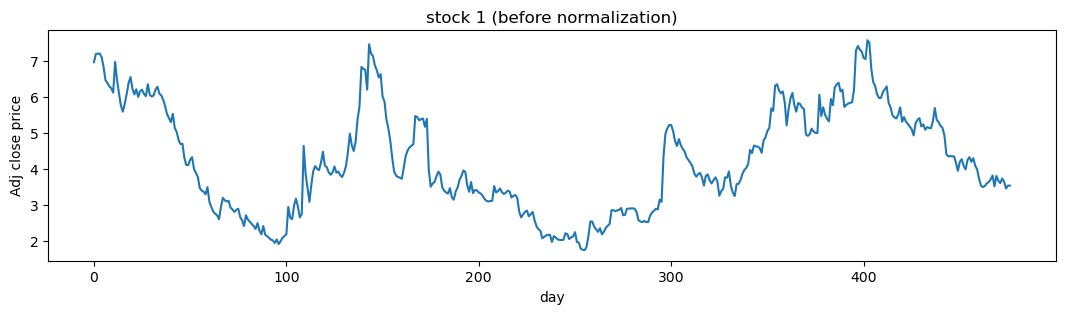

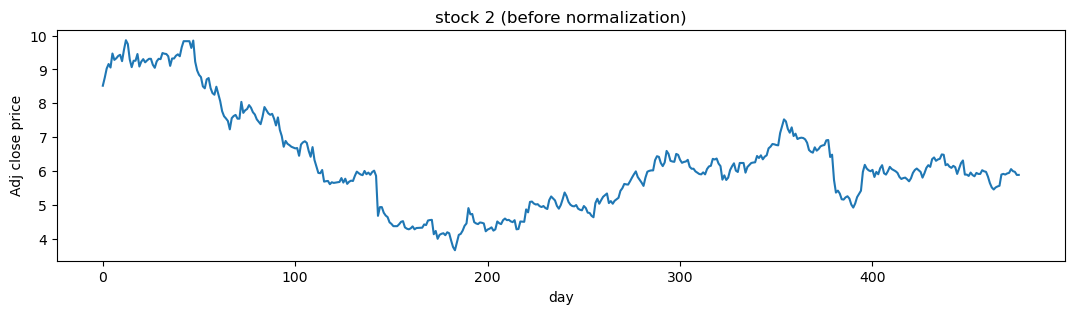

In [60]:
plt.figure(figsize=(13,3))
plt.plot(My_Dataset['stock 1']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 1 (before normalization)')

plt.figure(figsize=(13,3))
plt.plot(My_Dataset['stock 2']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 2 (before normalization)');

## Data Normalization :

$$Stock_i = \frac{Stock_i - mean(Stock_i)}{max(Stock_i)}$$

In [61]:
for col in My_Dataset.columns:
    My_Dataset[col] = (My_Dataset[col] - My_Dataset[col].mean()) / My_Dataset[col].max()

# Print the updated DataFrame
My_Dataset.head()

,stock 1,stock 2,stock 3,stock 4,stock 5,stock 6,stock 7,stock 8,stock 9,stock 10,...,stock 5409,stock 5410,stock 5411,stock 5412,stock 5413,stock 5414,stock 5415,stock 5416,stock 5417,stock 5418
0,0.360800,0.232307,-0.091259,-0.053002,-0.033786,0.217174,0.222711,0.284367,-0.093567,-0.136668,...,0.476138,-0.041359,-0.243252,-0.197841,-0.196751,-0.051371,0.119574,0.202217,0.052254,0.246124
1,0.391183,0.256147,-0.087260,-0.033134,-0.043944,0.226615,0.222711,0.316057,-0.077473,-0.125204,...,0.525977,-0.041359,-0.252609,-0.183597,-0.193732,-0.047079,0.154214,0.250929,0.030515,0.276271
2,0.392064,0.283483,-0.090392,-0.039283,-0.047330,0.216609,0.267354,0.319015,-0.070342,-0.125204,...,0.504134,-0.045759,-0.224539,-0.183119,-0.183399,-0.045648,0.130058,0.257799,0.046268,0.280382
3,0.392504,0.297151,-0.091958,-0.042358,-0.049023,0.211606,0.289675,0.320494,-0.066776,-0.125204,...,0.493213,-0.047959,-0.210504,-0.182881,-0.178233,-0.044933,0.117980,0.261233,0.054144,0.282438
4,0.379294,0.286662,-0.110851,-0.069322,-0.028142,0.145520,0.285211,0.315931,-0.084060,-0.102276,...,0.486291,-0.062811,-0.176586,-0.169802,-0.173804,-0.042787,0.070801,0.278564,0.040912,0.233106


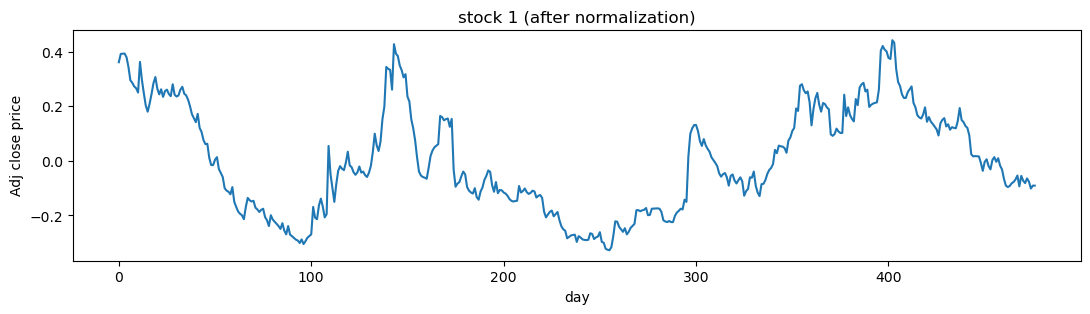

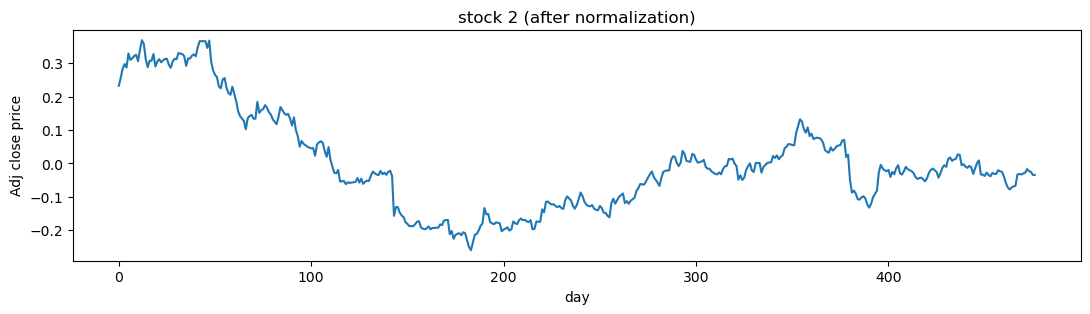

In [62]:
plt.figure(figsize=(13,3))
plt.plot(My_Dataset['stock 1']);
plt.xlabel('day')
plt.ylabel('Adj close price')
plt.title('stock 1 (after normalization)')

plt.figure(figsize=(13,3))
plt.plot(My_Dataset['stock 2']);
plt.xlabel('day')
plt.ylabel('Adj close price')

plt.title('stock 2 (after normalization)');

In [63]:
def prepair_input(df, col_index):          # prepair each column of DataFrame for feed to network. 
    return torch.tensor(df[f'stock {col_index}'].to_numpy().reshape(1,1,-1).tolist()).to(device=device)

In [64]:
data = prepair_input(My_Dataset,1)
data.shape       # data   >>>    300-day Adj close price of stock 1 .

torch.Size([1, 1, 477])

---

## AE Architectures :

In this study , we aim to use a **Convoloutional Auto Encoder** with Deep UnderComplete architecture  to extract 64-dimentional feature vector from a Stock price time series .

In [65]:
import torch
import torch.nn as nn

# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_shape, latent_dim):
        super(Autoencoder, self).__init__()     ## input shape : (batch size, num_channel, time_step)
        
        # Define the encoder architecture
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=input_shape[1], out_channels=128, kernel_size=8,padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=64, kernel_size=5,padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Conv1d(in_channels=64, out_channels=1, kernel_size=3,padding=1),
            nn.BatchNorm1d(1),
            nn.ReLU(),
            nn.Flatten(),# input_shape[2]
            nn.Linear(input_shape[2]-7,latent_dim)
        )
        
        # Define the decoder architecture
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim,input_shape[2]-7),#)64 * input_shape[2]),
            nn.ReLU(),
            nn.Unflatten(1, (1, input_shape[2]-7)), # input_shape[2]
            nn.ConvTranspose1d(1, 64, kernel_size=3,padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(64, 128, kernel_size=5,padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(128, input_shape[1], kernel_size=8,padding=1),#, padding='same'),
            # nn.ReLU()
        )
        
    def forward(self, x):
        # Encode the input
        encoded = self.encoder(x)
        # print(encoded.shape)
        # Decode the encoded input
        decoded = self.decoder(encoded)
        
        return decoded# decoded


In [66]:
num_features = 1
time_steps = 477
latent_dim = 64

input_shape = (None,num_features, time_steps) 
# Create an instance of the CNN model
autoencoder = Autoencoder(input_shape, latent_dim).to(device=device)


In [68]:
test_sample = torch.rand(1,1,477).to(device=device)
with torch.no_grad():
    print(autoencoder(test_sample).shape)

torch.Size([1, 1, 477])


In [69]:
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Conv1d(1, 128, kernel_size=(8,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(128, 64, kernel_size=(5,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv1d(64, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=470, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=470, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(1, 470))
    (3): ConvTranspose1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): ReLU()
    (5): ConvTranspose1d(64, 128, kernel_size=(5,), stride=(1,), padding=(1,))
    (

In [70]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)


Epoch [30/300], Loss: 0.0024
Epoch [60/300], Loss: 0.0010
Epoch [90/300], Loss: 0.0007
Epoch [120/300], Loss: 0.0006
Epoch [150/300], Loss: 0.0006
Epoch [180/300], Loss: 0.0005
Epoch [210/300], Loss: 0.0005
Epoch [240/300], Loss: 0.0005
Epoch [270/300], Loss: 0.0005
Epoch [300/300], Loss: 0.0007


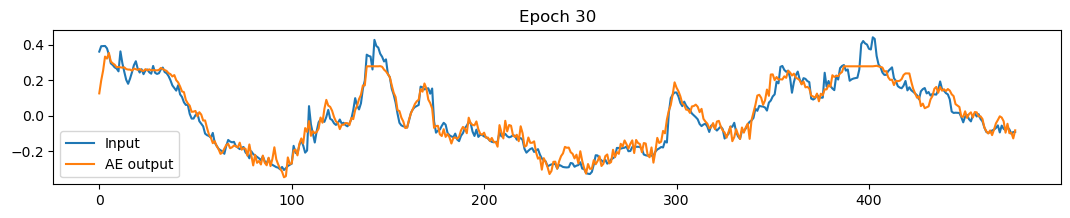

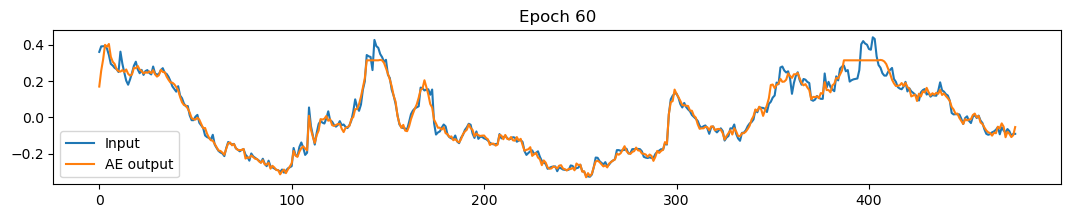

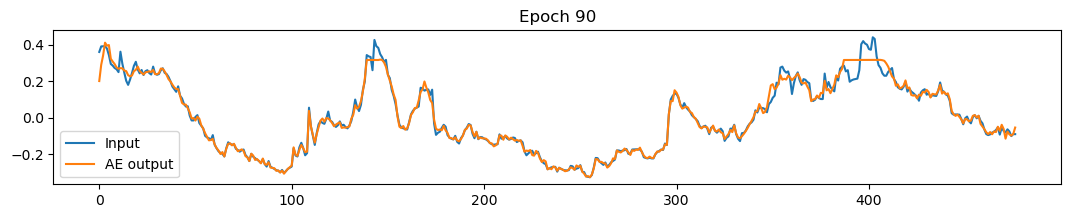

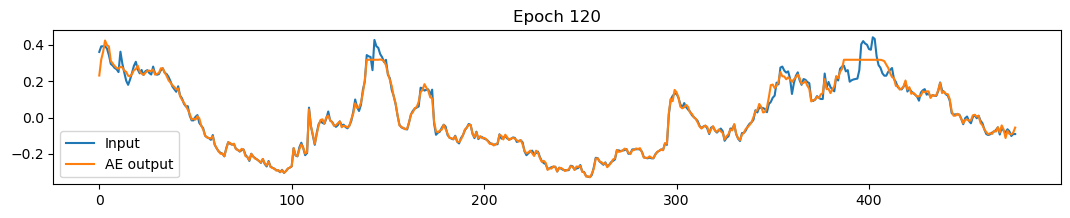

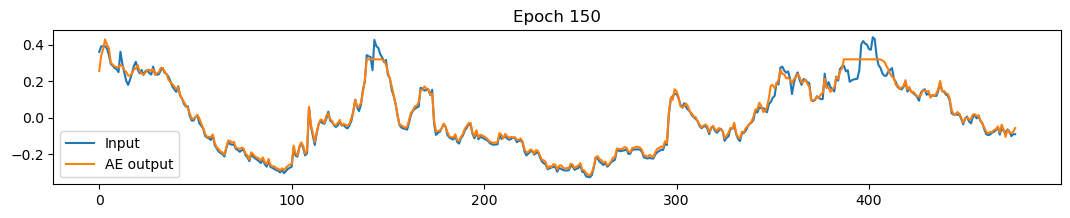

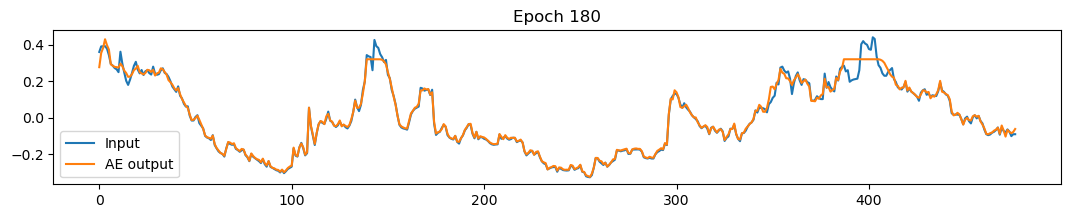

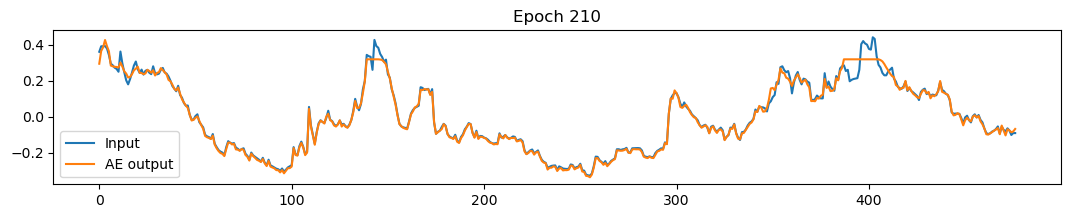

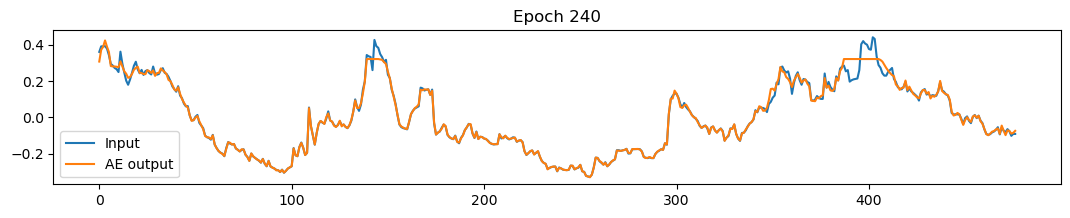

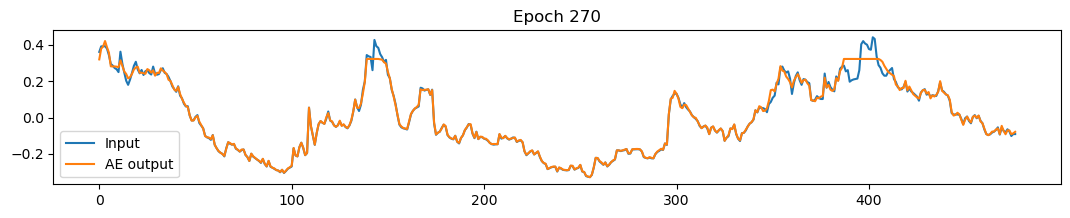

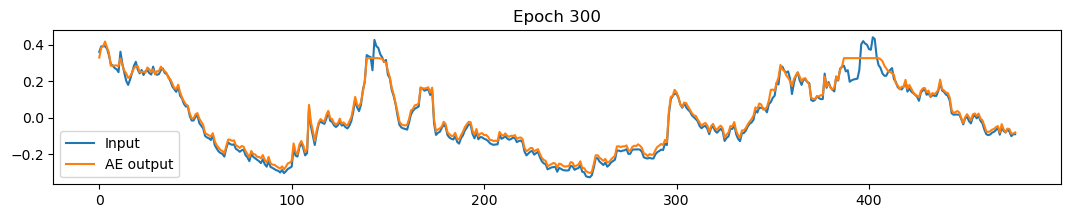

In [71]:
num_epochs = 300
inputs = data
# Training loop
for epoch in range(num_epochs):
    autoencoder.train()
    # Forward pass
    outputs = autoencoder(inputs)
    loss = criterion(outputs, inputs)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss for every few epochs
    if (epoch+1) % 30 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        plt.figure(figsize=(13,2))
        plt.plot(torch.Tensor.cpu(inputs.flatten()).numpy())
        plt.plot(torch.detach(torch.Tensor.cpu(outputs.flatten())).numpy())
        plt.title(f'Epoch {epoch+1}')
        plt.legend(['Input','AE output'])



Model evaluation :


In [72]:
# Evaluation on test data
new_inputs  = prepair_input(My_Dataset,2)

autoencoder.eval()

with torch.no_grad():
    output = autoencoder(new_inputs)

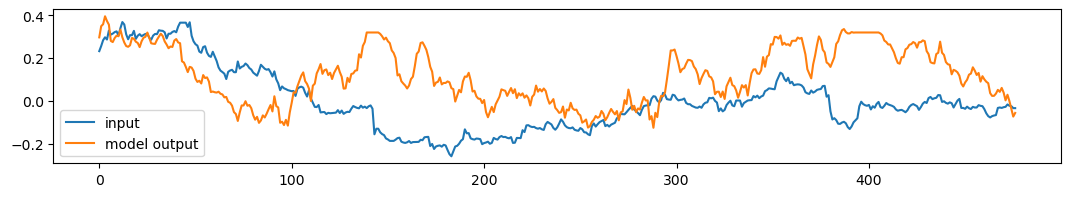

In [73]:
plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output.flatten())).numpy())
plt.legend(['input','model output']);

Train Auto Encoder model with all Stock markets :

prepair training data

In [74]:
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm


In [75]:
torch.concatenate( (data,data)).shape

torch.Size([2, 1, 477])

In [76]:
def prepair_train_data(My_Dataset):
    for i in range(len(My_Dataset.columns)):
        if i ==0 :
            input_data = prepair_input(My_Dataset,1)
        else : 
            input_data = torch.concatenate((input_data,prepair_input(My_Dataset,i+1)))
            
    return input_data

In [77]:
train_input = prepair_train_data(My_Dataset=My_Dataset)
train_target = prepair_train_data(My_Dataset=My_Dataset)

In [78]:
train_input.shape, train_target.shape

(torch.Size([5418, 1, 477]), torch.Size([5418, 1, 477]))

define `DataLoader` :

In [79]:
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [81]:
dataset = StockDataset(train_input, train_target)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [82]:
for batch_idx, (data, targets) in enumerate(tqdm(dataloader)):
    print(targets.shape, "   <<>>   ",data.shape)
    
    if batch_idx == 5:
        break

  0%|          | 5/1355 [00:00<00:02, 568.49it/s]

torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])
torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])
torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])
torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])
torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])
torch.Size([4, 1, 477])    <<>>    torch.Size([4, 1, 477])


Define model and optimizer :

In [83]:
num_features = 1
time_steps = 477
latent_dim = 64

input_shape = (None,num_features, time_steps) 
# Create an instance of the CNN model
autoencoder = Autoencoder(input_shape, latent_dim).to(device=device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

In [84]:
num_epochs = 300

# Train Network
losses = []
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for batch_idx, (data, targets) in enumerate(tqdm(dataloader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # forward
        output = autoencoder(data)
        loss = criterion(output, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
        running_loss += loss.item()
        
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.6f}'.format(epoch+1, num_epochs, epoch_loss))

100%|██████████| 1355/1355 [00:17<00:00, 79.31it/s]


Epoch [10/300], Loss: 0.000722


100%|██████████| 1355/1355 [00:17<00:00, 78.44it/s]


Epoch [20/300], Loss: 0.000582


100%|██████████| 1355/1355 [00:07<00:00, 170.73it/s]


Epoch [30/300], Loss: 0.000498


100%|██████████| 1355/1355 [00:06<00:00, 206.69it/s]


Epoch [40/300], Loss: 0.000455


100%|██████████| 1355/1355 [00:06<00:00, 202.97it/s]


Epoch [50/300], Loss: 0.000414


100%|██████████| 1355/1355 [00:06<00:00, 202.99it/s]


Epoch [60/300], Loss: 0.000390


100%|██████████| 1355/1355 [00:06<00:00, 194.08it/s]


Epoch [70/300], Loss: 0.000333


100%|██████████| 1355/1355 [00:06<00:00, 200.50it/s]


Epoch [80/300], Loss: 0.000326


100%|██████████| 1355/1355 [00:06<00:00, 207.78it/s]


Epoch [90/300], Loss: 0.000305


100%|██████████| 1355/1355 [00:07<00:00, 169.95it/s]


Epoch [100/300], Loss: 0.000303


100%|██████████| 1355/1355 [00:07<00:00, 172.24it/s]


Epoch [110/300], Loss: 0.000286


100%|██████████| 1355/1355 [00:06<00:00, 209.69it/s]


Epoch [120/300], Loss: 0.000290


100%|██████████| 1355/1355 [00:06<00:00, 198.96it/s]


Epoch [130/300], Loss: 0.000286


100%|██████████| 1355/1355 [00:06<00:00, 202.15it/s]


Epoch [140/300], Loss: 0.000277


100%|██████████| 1355/1355 [00:07<00:00, 190.04it/s]


Epoch [150/300], Loss: 0.000288


100%|██████████| 1355/1355 [00:06<00:00, 207.82it/s]


Epoch [160/300], Loss: 0.000255


100%|██████████| 1355/1355 [00:06<00:00, 202.09it/s]


Epoch [170/300], Loss: 0.000250


100%|██████████| 1355/1355 [00:06<00:00, 199.77it/s]


Epoch [180/300], Loss: 0.000251


100%|██████████| 1355/1355 [00:06<00:00, 198.16it/s]


Epoch [190/300], Loss: 0.000247


100%|██████████| 1355/1355 [00:06<00:00, 206.07it/s]


Epoch [200/300], Loss: 0.000264


100%|██████████| 1355/1355 [00:06<00:00, 206.56it/s]


Epoch [210/300], Loss: 0.000253


100%|██████████| 1355/1355 [00:07<00:00, 183.86it/s]


Epoch [220/300], Loss: 0.000228


100%|██████████| 1355/1355 [00:06<00:00, 196.98it/s]


Epoch [230/300], Loss: 0.000235


100%|██████████| 1355/1355 [00:06<00:00, 199.39it/s]


Epoch [240/300], Loss: 0.000213


100%|██████████| 1355/1355 [00:06<00:00, 194.76it/s]


Epoch [250/300], Loss: 0.000225


100%|██████████| 1355/1355 [00:06<00:00, 213.74it/s]


Epoch [260/300], Loss: 0.000209


100%|██████████| 1355/1355 [00:07<00:00, 188.07it/s]


Epoch [270/300], Loss: 0.000226


100%|██████████| 1355/1355 [00:07<00:00, 193.34it/s]


Epoch [280/300], Loss: 0.000208


100%|██████████| 1355/1355 [00:06<00:00, 207.96it/s]


Epoch [290/300], Loss: 0.000241


100%|██████████| 1355/1355 [00:07<00:00, 180.50it/s]

Epoch [300/300], Loss: 0.000208


Text(0.5, 1.0, 'training loss  (batch size = 4)')

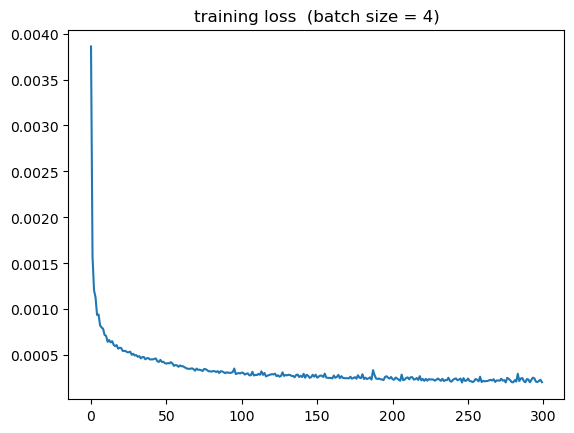

In [86]:
plt.plot(losses,)
plt.title('training loss  (batch size = 4)')

In [87]:
len(losses)

300

Model evaluation :


In [88]:
# Evaluation on test data
new_inputs1  = prepair_input(My_Dataset,2)
new_inputs2  = prepair_input(My_Dataset,4)
new_inputs3  = prepair_input(My_Dataset,7)
new_inputs4  = prepair_input(My_Dataset,8)
new_inputs5  = prepair_input(My_Dataset,21)
new_inputs6  = prepair_input(My_Dataset,27)
new_inputs7  = prepair_input(My_Dataset,31)
new_inputs8  = prepair_input(My_Dataset,45)

autoencoder.eval()

with torch.no_grad():
    output1 = autoencoder(new_inputs1)
    output2 = autoencoder(new_inputs2)
    output3 = autoencoder(new_inputs3)
    output4 = autoencoder(new_inputs4)
    output5 = autoencoder(new_inputs5)
    output6 = autoencoder(new_inputs6)
    output7 = autoencoder(new_inputs7)
    output8 = autoencoder(new_inputs8)


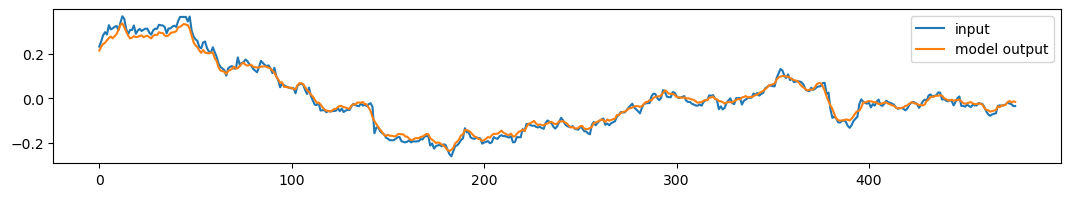

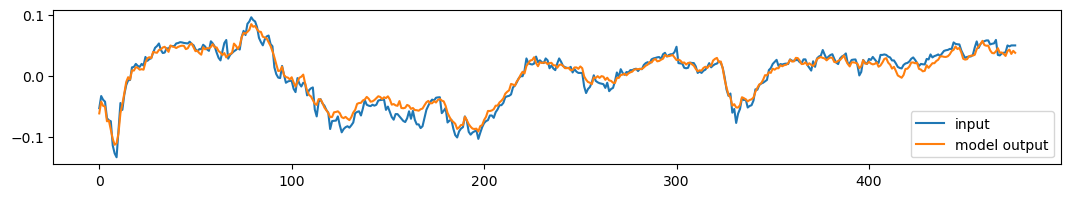

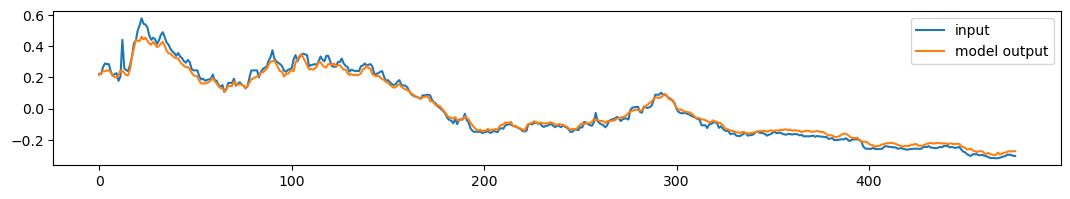

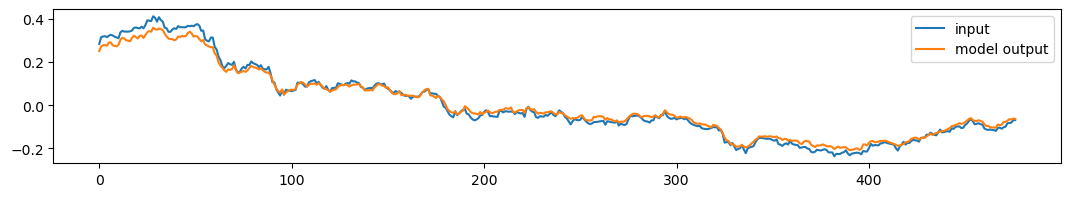

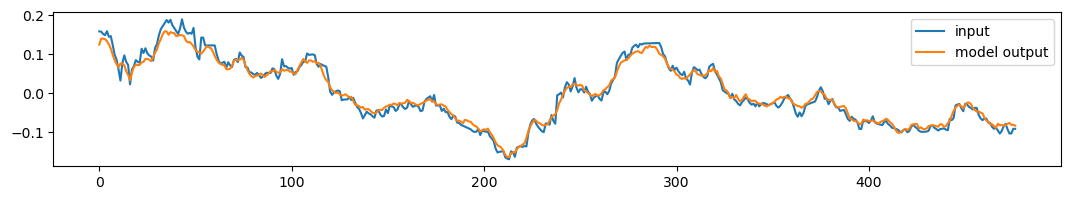

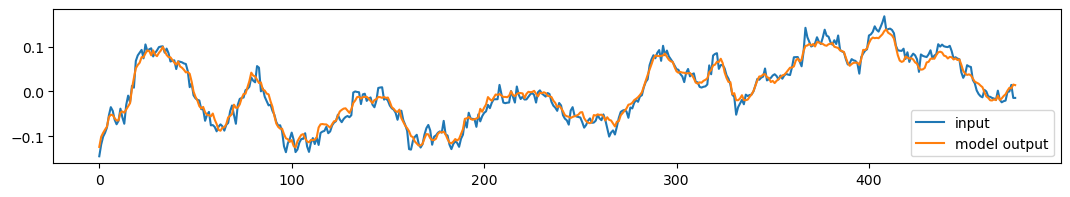

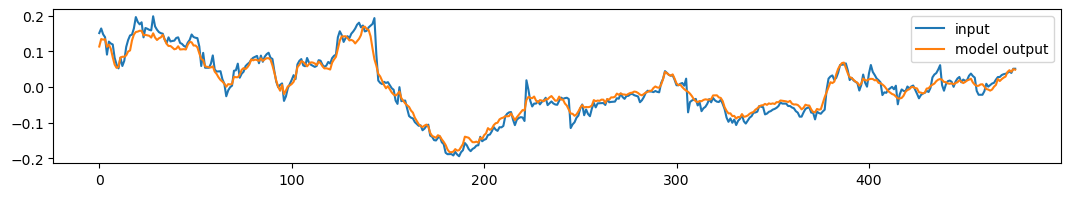

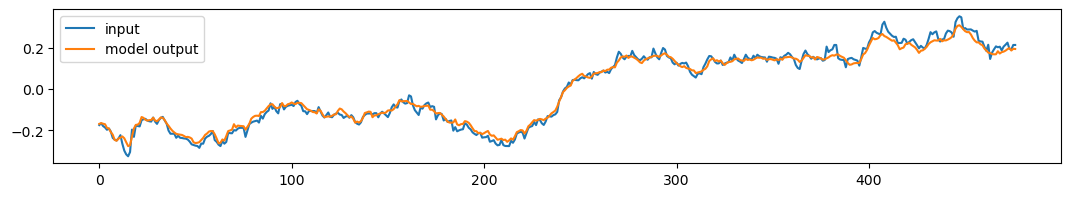

In [89]:
plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs1.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output1.flatten())).numpy())
plt.legend(['input','model output']);

plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs2.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output2.flatten())).numpy())
plt.legend(['input','model output']);


plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs3.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output3.flatten())).numpy())
plt.legend(['input','model output']);


plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs4.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output4.flatten())).numpy())
plt.legend(['input','model output']);

plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs5.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output5.flatten())).numpy())
plt.legend(['input','model output']);

plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs6.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output6.flatten())).numpy())
plt.legend(['input','model output']);

plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs7.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output7.flatten())).numpy())
plt.legend(['input','model output']);


plt.figure(figsize=(13,2))
plt.plot(torch.Tensor.cpu(new_inputs8.flatten()).numpy())
plt.plot(torch.detach(torch.Tensor.cpu(output8.flatten())).numpy())
plt.legend(['input','model output']);

Save model :

In [90]:
torch.save(autoencoder.state_dict(), '../data/processed/AE/AE_feature_extractor.pth')

Load model :

In [354]:
autoencoder.load_state_dict(torch.load('../data/processed/AE/AE_feature_extractor.pth'))

<All keys matched successfully>

Drop **decoder** of AE :

In [91]:
autoencoder.decoder = nn.Identity()

In [92]:
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Conv1d(1, 128, kernel_size=(8,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(128, 64, kernel_size=(5,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv1d(64, 1, kernel_size=(3,), stride=(1,), padding=(1,))
    (7): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=470, out_features=64, bias=True)
  )
  (decoder): Identity()
)


In [93]:
new_inputs  = prepair_input(My_Dataset,4)

autoencoder.eval()

with torch.no_grad():
    output = autoencoder(new_inputs)

In [94]:
print(output,'\n\n')
print(output.shape) 

tensor([[ 2.0020e-02,  1.9839e-01, -8.7518e-01, -7.7752e-01, -2.1413e-02,
         -9.7290e-02,  5.8019e-01,  1.2954e-01,  9.5502e-02, -1.8756e-01,
         -5.2353e-01, -2.6388e-02,  9.0462e-02, -1.7786e-01,  3.7248e-01,
         -2.8238e-01,  1.8160e-01,  8.5644e-01,  1.8696e-01, -6.0355e-01,
          4.8879e-02, -2.1887e-01,  4.0910e-02,  2.3793e-01, -3.0006e-02,
          7.8200e-02, -1.7060e-03, -3.1633e+00,  5.2988e-02,  2.8128e-01,
         -1.9067e-01,  9.7409e-02,  1.4305e-01,  8.2084e-01,  1.0496e-01,
          8.3423e-02, -1.0134e-01,  1.0357e-01, -2.6216e-01, -3.9286e-02,
         -9.3190e-02, -7.8158e-02, -3.6614e-02, -1.9483e-01,  2.2749e-01,
          1.8224e-03,  1.2445e-01,  6.4975e-01,  1.6778e+00,  3.2971e-01,
         -1.6387e-01,  7.9988e-02,  2.3707e-01,  2.1071e-01, -1.6318e-01,
         -5.9978e-02, -1.9933e-02, -1.0670e-01, -3.3864e-02,  1.4462e-01,
          7.4384e-01, -3.1748e+00, -2.2059e-01, -3.7556e-02]], device='cuda:0') 


torch.Size([1, 64])


Now , according to the above favorable results , our model can summarize each of the 50 stock markets in a 64-dimensional vector.

 And we use each of these vectors as a feature vector for each stock market for do clustering and community detection.

Saveing 50 embedded vectors of 50 Stocks : 

In [96]:
for i in range(len(stock_names)):
    i += 1
    new_inputs  = prepair_input(My_Dataset,i)

    autoencoder.eval()

    with torch.no_grad():
        output = autoencoder(new_inputs)
        
    
    if i == 1:
        embedded_vectors = output
    else :
        embedded_vectors = torch.concatenate((embedded_vectors,output))


In [97]:
embedded_vectors.shape

torch.Size([5418, 64])

In [98]:
# np.save('AE_features',torch.detach(torch.Tensor.cpu(embedded_vectors)).numpy())

----
---

### Clusterin using extracted features and `KMeans` algorithm:

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

features_mat = torch.detach(torch.Tensor.cpu(embedded_vectors)).numpy()

# Create a KMeans object with the desired number of clusters
num_clusters = 7  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to your feature matrix
kmeans.fit(features_mat)

# Get the cluster labels for each node
cluster_labels = kmeans.labels_

# Print the results
for i in range(7):
    cluster_points = [j for j, cluster in enumerate(cluster_labels) if cluster == i]
    print(f"Cluster {i+1}:")
    print(f"Data points: {cluster_points}")
    print()

In [ ]:

plt.figure(figsize=(18,3))
plt.plot(My_Dataset['stock 1']);
plt.plot(My_Dataset['stock 2']);
plt.plot(My_Dataset['stock 10']);
plt.plot(My_Dataset['stock 13']);
plt.plot(My_Dataset['stock 37']);
plt.plot(My_Dataset['stock 42']);
plt.title('Cluster 1')


plt.figure(figsize=(18,3))
plt.plot(My_Dataset['stock 3']);
plt.plot(My_Dataset['stock 40']);
plt.plot(My_Dataset['stock 46']);
plt.title('Cluster 2')


plt.figure(figsize=(18,3))
plt.plot(My_Dataset['stock 5']);
plt.plot(My_Dataset['stock 9']);
plt.plot(My_Dataset['stock 11']);
plt.plot(My_Dataset['stock 14']);
plt.plot(My_Dataset['stock 16']);
plt.plot(My_Dataset['stock 20']);
plt.plot(My_Dataset['stock 24']);
plt.plot(My_Dataset['stock 28']);
plt.plot(My_Dataset['stock 33']);
plt.plot(My_Dataset['stock 39']);
plt.plot(My_Dataset['stock 43']);
plt.plot(My_Dataset['stock 45']);
plt.plot(My_Dataset['stock 48']);
plt.title('Cluster 3')



plt.figure(figsize=(18,3))
plt.plot(My_Dataset['stock 6']);
plt.plot(My_Dataset['stock 15']);
plt.plot(My_Dataset['stock 18']);
plt.plot(My_Dataset['stock 19']);
plt.plot(My_Dataset['stock 21']);
plt.plot(My_Dataset['stock 29']);
plt.plot(My_Dataset['stock 30']);
plt.plot(My_Dataset['stock 34']);
plt.plot(My_Dataset['stock 36']);
plt.plot(My_Dataset['stock 38']);
plt.plot(My_Dataset['stock 41']);
plt.plot(My_Dataset['stock 44']);
plt.plot(My_Dataset['stock 47']);
plt.plot(My_Dataset['stock 50']);
plt.title('Cluster 4')



plt.figure(figsize=(18,3))
plt.plot(My_Dataset['stock 4']);
plt.plot(My_Dataset['stock 8']);
plt.plot(My_Dataset['stock 12']);
plt.plot(My_Dataset['stock 22']);
plt.plot(My_Dataset['stock 25']);
plt.plot(My_Dataset['stock 26']);
plt.plot(My_Dataset['stock 27']);
plt.plot(My_Dataset['stock 31']);
plt.plot(My_Dataset['stock 32']);
plt.plot(My_Dataset['stock 35']);
plt.plot(My_Dataset['stock 49']);
plt.title('Cluster 5')


Plot `t-SNE` :

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_embedded = tsne.fit_transform(features_mat)

# Plot the t-SNE visualization
plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels)
plt.colorbar()
plt.show()